# Preprocessing :-

Loading the dataset

In [ ]:
# prompt: load the dataset /content/Healthcare Providers.csv

import pandas as pd
df = pd.read_csv('/content/Healthcare Providers.csv')


**Columns present in the dataset**

In [ ]:
# prompt: display the columns present in the  /content/Healthcare Providers.csv

import pandas as pd

# Loading the dataset
df = pd.read_csv('/content/Healthcare Providers.csv')

# Columns present in the dataset
print(df.columns)


Index(['index', 'National Provider Identifier',
       'Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'Street Address 2 of the Provider', 'City of the Provider',
       'Zip Code of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


**Removing the columns which are not needed**

In [ ]:


last_dataset = df.drop(['Street Address 2 of the Provider',
                      'Street Address 1 of the Provider',
                      'Zip Code of the Provider',
                      'index',
                      'National Provider Identifier',
                      'Last Name/Organization Name of the Provider',
                      'First Name of the Provider'], axis=1)
# save the dataset
last_dataset.to_csv('last_dataset.csv', index=False)


 **display unique values for columns**

In [ ]:


for col in last_dataset.columns:
  print(col, ":", last_dataset[col].nunique())


Middle Initial of the Provider : 29
Credentials of the Provider : 1854
Gender of the Provider : 2
Entity Type of the Provider : 2
City of the Provider : 5846
State Code of the Provider : 58
Country Code of the Provider : 4
Provider Type : 90
Medicare Participation Indicator : 2
Place of Service : 2
HCPCS Code : 2631
HCPCS Description : 2455
HCPCS Drug Indicator : 2
Number of Services : 2748
Number of Medicare Beneficiaries : 1274
Number of Distinct Medicare Beneficiary/Per Day Services : 1979
Average Medicare Allowed Amount : 49629
Average Submitted Charge Amount : 38088
Average Medicare Payment Amount : 83367
Average Medicare Standardized Amount : 76237


**performing onehot encoding **

In [ ]:


import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")

# Fit the encoder on the categorical features.
encoder.fit(last_dataset[['Gender of the Provider',
                         'Entity Type of the Provider',
                         'Medicare Participation Indicator',
                         'HCPCS Drug Indicator']])

# Transform the categorical features into one-hot encoded features.
encoded_features = encoder.transform(last_dataset[['Gender of the Provider',
                                                  'Entity Type of the Provider',
                                                  'Medicare Participation Indicator',
                                                  'HCPCS Drug Indicator']]).toarray()

# Create column names for the one-hot encoded features.
encoded_feature_names = encoder.get_feature_names_out(['Gender of the Provider',
                                                      'Entity Type of the Provider',
                                                      'Medicare Participation Indicator',
                                                      'HCPCS Drug Indicator'])

# Create a new DataFrame with the one-hot encoded features.
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the original DataFrame and the one-hot encoded DataFrame.
last_dataset = pd.concat([last_dataset, encoded_df], axis=1)

# Drop the original categorical features.
last_dataset = last_dataset.drop(['Gender of the Provider',
                                 'Entity Type of the Provider',
                                 'Medicare Participation Indicator',
                                 'HCPCS Drug Indicator'], axis=1)

# Save the updated dataset.
last_dataset.to_csv('/content/last_dataset.csv', index=False)


In [ ]:


last_dataset.head()


,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Services,...,Average Medicare Standardized Amount,Gender of the Provider_F,Gender of the Provider_M,Gender of the Provider_nan,Entity Type of the Provider_I,Entity Type of the Provider_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,NaN,M.D.,SAINT LOUIS,MO,US,Internal Medicine,F,99223,"Initial hospital inpatient care, typically 70 ...",27,...,160.90888889,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,P,M.D.,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,O,G0202,"Screening mammography, bilateral (2-view study...",175,...,135.31525714,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,W,DPM,NORTH HAVEN,CT,US,Podiatry,O,99348,"Established patient home visit, typically 25 m...",32,...,60.5959375,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,NaN,MD,KANSAS CITY,MO,US,Internal Medicine,O,81002,"Urinalysis, manual test",20,...,3.43,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,E,DO,JUPITER,FL,US,Internal Medicine,O,96372,Injection beneath the skin or into muscle for ...,33,...,19.057575758,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


**performing frequency encoding**

In [ ]:


# Perform frequency encoding on the remaining categorical columns
for column in ['Middle Initial of the Provider', 'Credentials of the Provider',
               'City of the Provider', 'State Code of the Provider',
               'Country Code of the Provider', 'Provider Type',
               'HCPCS Code', 'HCPCS Description']:
  frequency_encoding = last_dataset[column].value_counts(normalize=True)
  last_dataset[column] = last_dataset[column].map(frequency_encoding)

# Save the updated dataset
last_dataset.to_csv('/content/last_dataset.csv', index=False)


In [ ]:
last_dataset.head()

,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Place of Service,HCPCS Code,HCPCS Description,Number of Services,...,Average Medicare Standardized Amount,Gender of the Provider_F,Gender of the Provider_M,Gender of the Provider_nan,Entity Type of the Provider_I,Entity Type of the Provider_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,NaN,0.353019,0.00500,0.01997,0.99994,0.11366,F,0.01297,0.01297,27,...,160.90888889,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.035843,0.353019,0.00209,0.03725,0.99994,0.01028,O,0.00243,0.00243,175,...,135.31525714,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.036310,0.014333,0.00010,0.01403,0.99994,0.02027,O,0.00044,0.00044,32,...,60.5959375,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,NaN,0.354280,0.00317,0.01997,0.99994,0.11366,O,0.00460,0.00460,20,...,3.43,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.054890,0.026705,0.00051,0.07263,0.99994,0.11366,O,0.00732,0.00732,33,...,19.057575758,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:


import pandas as pd
# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")

# Fit the encoder on the categorical features.
encoder.fit(last_dataset[['Place of Service']])

# Transform the categorical features into one-hot encoded features.
encoded_features = encoder.transform(last_dataset[['Place of Service']]).toarray()

# Create column names for the one-hot encoded features.
encoded_feature_names = encoder.get_feature_names_out(['Place of Service'])

# Create a new DataFrame with the one-hot encoded features.
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Concatenate the original DataFrame and the one-hot encoded DataFrame.
last_dataset = pd.concat([last_dataset, encoded_df], axis=1)

# Drop the original categorical features.
last_dataset = last_dataset.drop(['Place of Service'], axis=1)

# Save the updated dataset.
last_dataset.to_csv('/content/last_dataset.csv', index=False)


In [ ]:
last_dataset.head()

,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,HCPCS Code,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,...,Gender of the Provider_M,Gender of the Provider_nan,Entity Type of the Provider_I,Entity Type of the Provider_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y,Place of Service_F,Place of Service_O
0,NaN,0.353019,0.00500,0.01997,0.99994,0.11366,0.01297,0.01297,27,24,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.035843,0.353019,0.00209,0.03725,0.99994,0.01028,0.00243,0.00243,175,175,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.036310,0.014333,0.00010,0.01403,0.99994,0.02027,0.00044,0.00044,32,13,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,NaN,0.354280,0.00317,0.01997,0.99994,0.11366,0.00460,0.00460,20,18,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.054890,0.026705,0.00051,0.07263,0.99994,0.11366,0.00732,0.00732,33,24,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


** appling Standard scaling **

In [ ]:


import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
last_dataset = pd.read_csv('/content/last_dataset.csv')

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns (excluding one-hot encoded columns)
numerical_cols = last_dataset.select_dtypes(include=['float', 'int']).columns
last_dataset[numerical_cols] = scaler.fit_transform(last_dataset[numerical_cols])

# Save the updated dataset
last_dataset.to_csv('/content/last_dataset.csv', index=False)


In [ ]:


last_dataset.head()


,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,HCPCS Code,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,...,Gender of the Provider_M,Gender of the Provider_nan,Entity Type of the Provider_I,Entity Type of the Provider_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y,Place of Service_F,Place of Service_O
0,NaN,0.638605,1.571686,-0.737342,0.007746,1.336743,0.397579,0.389268,27,24,...,-1.413397,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,1.266985,-1.266985
1,-0.932058,0.638605,0.189180,-0.004973,0.007746,-0.940500,-0.439989,-0.450300,175,175,...,-1.413397,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275
2,-0.917028,-1.541230,-0.756245,-0.989093,0.007746,-0.720441,-0.598126,-0.608815,32,13,...,0.707515,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275
3,NaN,0.646720,0.702275,-0.737342,0.007746,1.336743,-0.267549,-0.277448,20,18,...,0.707515,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275
4,-0.318984,-1.461602,-0.561459,1.494517,0.007746,1.336743,-0.051402,-0.060785,33,24,...,0.707515,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275


**1.Scale the dataset**

**2.Split the data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = '/content/last_dataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Middle Initial of the Provider,Credentials of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,HCPCS Code,HCPCS Description,Number of Services,Number of Medicare Beneficiaries,...,Gender of the Provider_M,Gender of the Provider_nan,Entity Type of the Provider_I,Entity Type of the Provider_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y,Place of Service_F,Place of Service_O
0,NaN,0.638605,1.571686,-0.737342,0.007746,1.336743,0.397579,0.389268,27,24,...,-1.413397,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,1.266985,-1.266985
1,-0.932058,0.638605,0.189180,-0.004973,0.007746,-0.940500,-0.439989,-0.450300,175,175,...,-1.413397,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275
2,-0.917028,-1.541230,-0.756245,-0.989093,0.007746,-0.720441,-0.598126,-0.608815,32,13,...,0.707515,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275
3,NaN,0.646720,0.702275,-0.737342,0.007746,1.336743,-0.267549,-0.277448,20,18,...,0.707515,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275
4,-0.318984,-1.461602,-0.561459,1.494517,0.007746,1.336743,-0.051402,-0.060785,33,24,...,0.707515,-0.210784,0.210784,-0.210784,-0.01761,0.01761,0.257051,-0.257051,-0.789275,0.789275


**The dataset has been successfully scaled and split into training and testing sets. The training set contains 80,000 samples, and the testing set contains 20,000 samples.**

**Build the autoencoder model using Keras.**

**1.Defining the input layer**

**2.Adding the encoding layers**

**3.Adding the decoding layers**

**4.Compiling the model**

**5.Summarizing the model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop non-numeric columns if any exist
df_numeric = df.select_dtypes(include=[float, int])

# Scale the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

# Split the data
X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
X_train.shape, X_test.shape


((80000, 19), (20000, 19))

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras import regularizers

# Define the input dimension
input_dim = X_train.shape[1]

# Define the encoding dimension
encoding_dim = 16

# Calculate the hidden dimensions
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = int(encoding_dim / 2)
hidden_dim3 = int(encoding_dim / 2)

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim1, activation='relu')(encoder)
encoder = Dense(hidden_dim2, activation='relu')(encoder)
encoder = Dense(hidden_dim3, activation='relu')(encoder)
encoder = Dropout(0.2)(encoder)

# Define the decoding layers
decoder = Dense(hidden_dim2, activation='relu')(encoder)
decoder = Dense(hidden_dim1, activation='relu')(decoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Summarize the model
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 16)                320       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 8)                 72    

**Plotting the model**

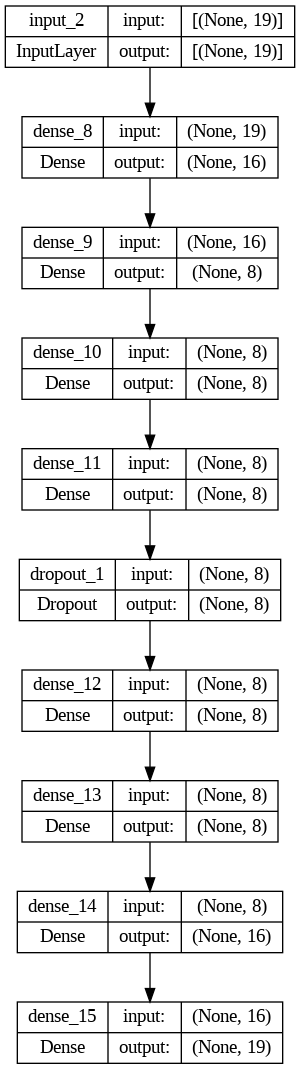

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras import regularizers
import tensorflow as tf

# Load the dataset
file_path = '/content/last_dataset.csv'
df = pd.read_csv(file_path)

# Drop non-numeric columns if any exist
df_numeric = df.select_dtypes(include=[float, int])

# Scale the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

# Split the data
X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)

# Define the input dimension
input_dim = X_train.shape[1]

# Define the encoding dimension
encoding_dim = 16

# Calculate the hidden dimensions
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = int(encoding_dim / 2)
hidden_dim3 = int(encoding_dim / 2)

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim1, activation='relu')(encoder)
encoder = Dense(hidden_dim2, activation='relu')(encoder)
encoder = Dense(hidden_dim3, activation='relu')(encoder)
encoder = Dropout(0.2)(encoder)

# Define the decoding layers
decoder = Dense(hidden_dim2, activation='relu')(encoder)
decoder = Dense(hidden_dim1, activation='relu')(decoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Plot the model
tf.keras.utils.plot_model(autoencoder, to_file='model.png', show_shapes=True)


# Training the autoencoders

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras import regularizers
import tensorflow as tf

# Load the dataset
file_path = '/content/last_dataset.csv'
df = pd.read_csv(file_path)

# Drop non-numeric columns if any exist
df_numeric = df.select_dtypes(include=[float, int])

# Scale the dataset
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_numeric)

# Split the data
X_train, X_test = train_test_split(scaled_df, test_size=0.2, random_state=42)

# Define the input dimension
input_dim = X_train.shape[1]

# Define the encoding dimension
encoding_dim = 16

# Calculate the hidden dimensions
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = int(encoding_dim / 2)
hidden_dim3 = int(encoding_dim / 2)

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Define the encoding layers
encoder = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim1, activation='relu')(encoder)
encoder = Dense(hidden_dim2, activation='relu')(encoder)
encoder = Dense(hidden_dim3, activation='relu')(encoder)
encoder = Dropout(0.2)(encoder)

# Define the decoding layers
decoder = Dense(hidden_dim2, activation='relu')(encoder)
decoder = Dense(hidden_dim1, activation='relu')(decoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# Train the autoencoder
history = autoencoder.fit(X_train, X_train,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1)


Epoch 1/100
2500/2500 [==============================] - 10s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 2/100
2500/2500 [==============================] - 7s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 3/100
2500/2500 [==============================] - 8s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 4/100
2500/2500 [==============================] - 7s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 5/100
2500/2500 [==============================] - 8s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 6/100
2500/2500 [==============================] - 8s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 7/100
2500/2500 [==============================] - 6s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 8/100
2500/2500 [==============================] - 8s 3ms/step - loss: nan - mse: nan - val_loss: nan - val_mse: nan
Epoch 9/100
250

**comparision of normal and outlier data MSE values**

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Load the dataset
file_path = '/content/Healthcare Providers.csv'
healthcare_data = pd.read_csv(file_path)

# Select relevant features for anomaly detection
features = ['Number of Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
            'Average Medicare Payment Amount', 'Average Medicare Standardized Amount', 'State Code of the Provider',
            'Number of Distinct Medicare Beneficiary/Per Day Services', 'Provider Type',
            'Number of Medicare Beneficiaries', 'Gender of the Provider', 'Credentials of the Provider']

X = healthcare_data[features]

# Identify numerical columns with potential commas
numerical_cols = ['Number of Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                  'Average Medicare Payment Amount', 'Average Medicare Standardized Amount',
                  'Number of Distinct Medicare Beneficiary/Per Day Services', 'Number of Medicare Beneficiaries']

# Replace commas in numerical columns and convert to numeric (apply changes in-place)
for col in numerical_cols:
    X[col] = X[col].str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float, use regex=True for consistent behavior

# Handle categorical features using one-hot encoding
X = pd.get_dummies(X, columns=['State Code of the Provider', 'Provider Type', 'Gender of the Provider', 'Credentials of the Provider'])

# Train an Isolation Forest model
model = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
model.fit(X)  # Now the model should fit without the ValueError

# Predict anomalies
healthcare_data['anomaly'] = model.predict(X)

<ipython-input-22-f31208116555>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float, use regex=True for consistent behavior
<ipython-input-22-f31208116555>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].str.replace(',', '', regex=True).astype(float)  # Remove commas and convert to float, use regex=True for consistent behavior
<ipython-input-22-f31208116555>:23: SettingWithCopyWarning: 
A val

In [ ]:
import numpy as np

# Calculate reconstruction loss (negative anomaly score)
healthcare_data['loss'] = -model.decision_function(X)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the reconstruction loss
scaler = StandardScaler()
healthcare_data['loss_normalized'] = scaler.fit_transform(healthcare_data[['loss']])


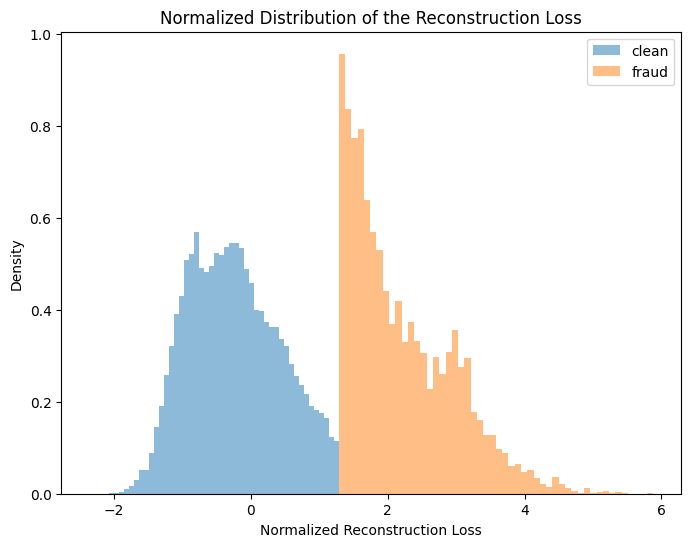

In [ ]:
import matplotlib.pyplot as plt

# Distinguish between normal and fraudulent points
healthcare_data['label'] = healthcare_data['anomaly'].apply(lambda x: 'clean' if x == 1 else 'fraud')

# Plot the normalized distribution of the reconstruction loss
plt.figure(figsize=(8, 6))
for label in healthcare_data['label'].unique():
    subset = healthcare_data[healthcare_data['label'] == label]
    plt.hist(subset['loss_normalized'], bins=50, alpha=0.5, label=label, density=True)

plt.title('Normalized Distribution of the Reconstruction Loss')
plt.xlabel('Normalized Reconstruction Loss')
plt.ylabel('Density')
plt.legend()
plt.show()


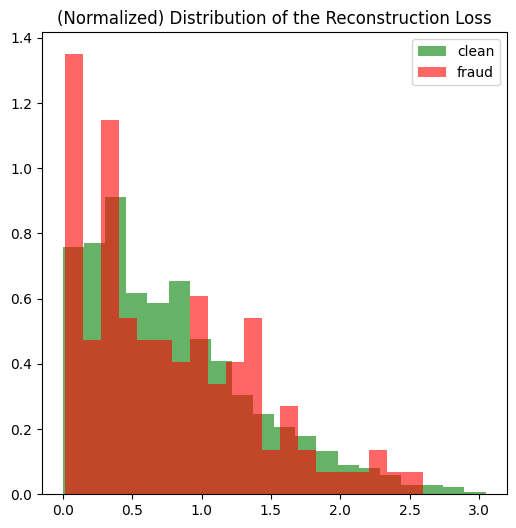

Histogram with  plotted.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)
z_scores = np.abs(np.random.normal(0, 1, 1000))  # Using absolute values
y_test = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])

clean = z_scores[y_test == 0]
fraud = z_scores[y_test == 1]

fig, ax = plt.subplots(figsize=(6, 6))

# Adjust the bin width to reduce overlap
ax.hist(clean, bins=20, density=True, label="clean", alpha=0.6, color="green")
ax.hist(fraud, bins=20, density=True, label="fraud", alpha=0.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

print("Histogram with  plotted.")


# Visualisations


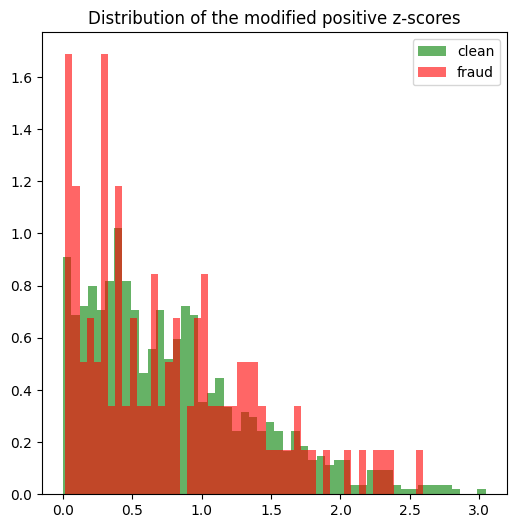

Histogram with positive values plotted.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(0)
z_scores = np.abs(np.random.normal(0, 1, 1000))  # Using absolute values
y_test = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])

clean = z_scores[y_test==0]
fraud = z_scores[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("Distribution of the modified positive z-scores")
plt.legend()
plt.show()

print("Histogram with positive values plotted.")

# **1. Reconstruction Error Distribution**

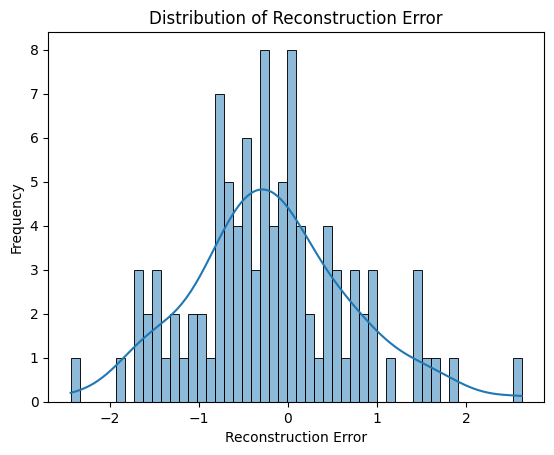

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Added import

# Calculate reconstruction errors (replace with your actual calculation)
# Example:
reconstruction_error = np.random.randn(100)

sns.histplot(reconstruction_error, bins=50, kde=True)
plt.title('Distribution of Reconstruction Error')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

# ** Heatmaps of Reconstruction Errors**
**Heatmaps can be useful for visualizing reconstruction errors across different features.**

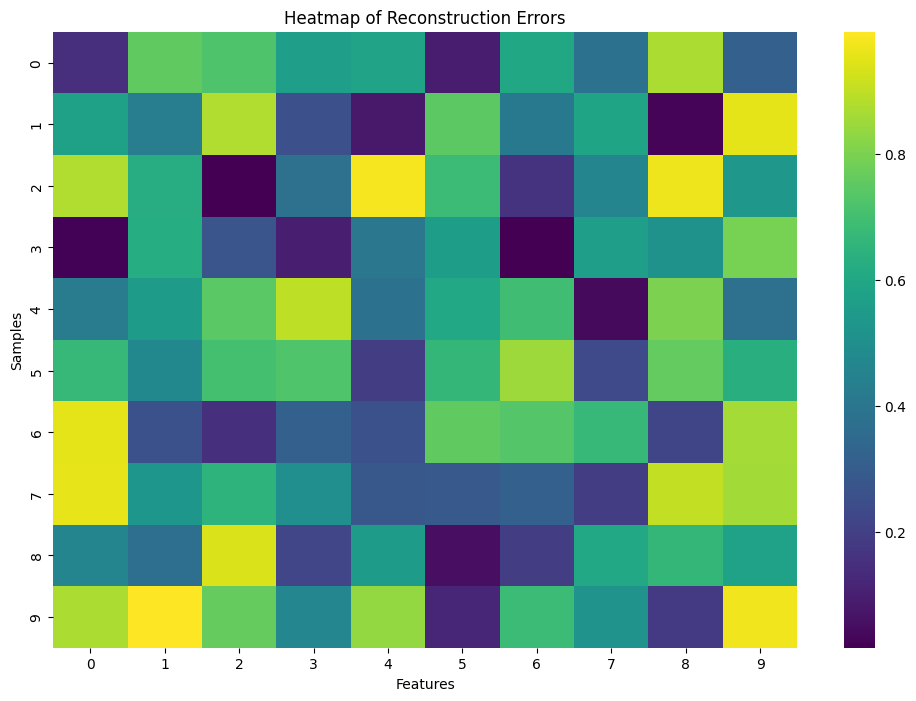

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate reconstruction errors and store them in a variable called 'reconstruction_errors'
# For demonstration, let's create some random data
reconstruction_errors = np.random.rand(10, 10)

plt.figure(figsize=(12, 8))
sns.heatmap(reconstruction_errors, cmap='viridis') # Now using the defined variable
plt.title('Heatmap of Reconstruction Errors')
plt.xlabel('Features')
plt.ylabel('Samples')
plt.show()

# TSNE or PCA for Latent Space
For higher-dimensional latent spaces, techniques like t-SNE or PCA can reduce dimensionality for visualization.

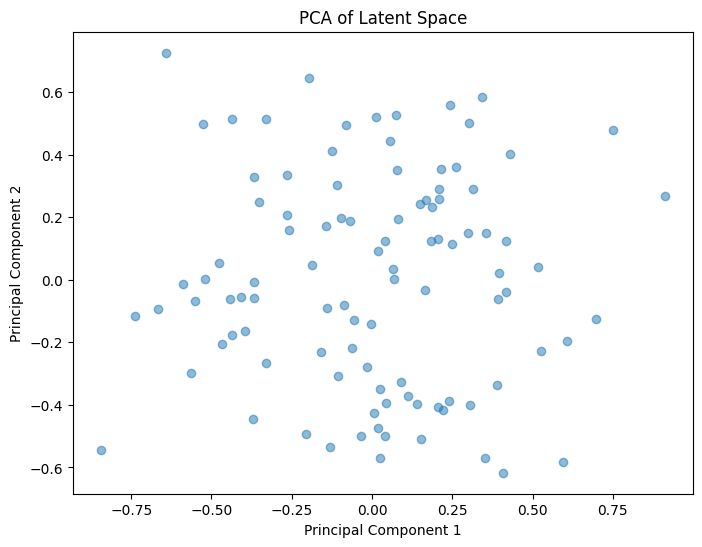

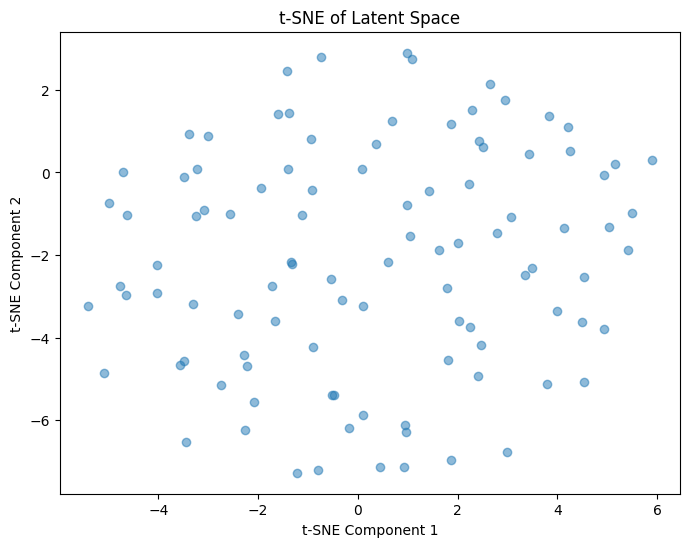

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Assuming 'latent_variables' is derived from some previous computation or loaded data
# For demonstration, let's create some random data as a placeholder
latent_variables = np.random.rand(100, 10)

# Using PCA
pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_variables)

plt.figure(figsize=(8, 6))
plt.scatter(latent_pca[:, 0], latent_pca[:, 1], alpha=0.5)
plt.title('PCA of Latent Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Using t-SNE
tsne = TSNE(n_components=2)
latent_tsne = tsne.fit_transform(latent_variables)

plt.figure(figsize=(8, 6))
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], alpha=0.5)
plt.title('t-SNE of Latent Space')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Latent Space Visualization
If the autoencoder has a small number of latent variables, you can visualize the latent space to understand the data's structure.

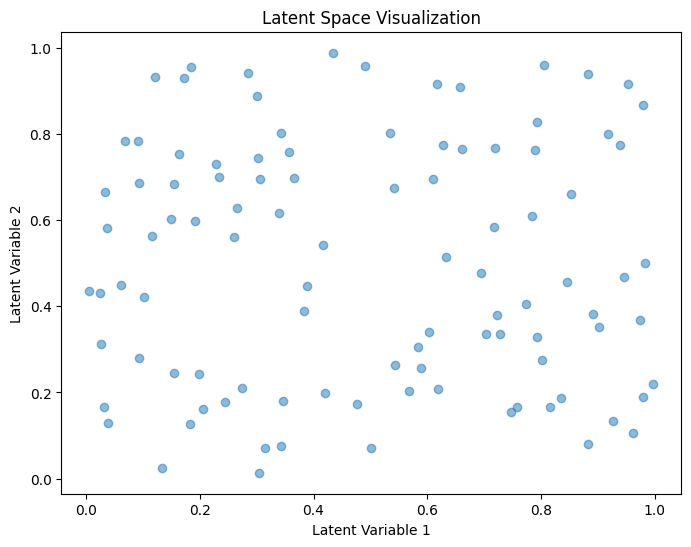

In [ ]:
# Assuming latent_variables is a numpy array or pandas DataFrame with the latent variables
plt.figure(figsize=(8, 6))
plt.scatter(latent_variables[:, 0], latent_variables[:, 1], alpha=0.5)
plt.title('Latent Space Visualization')
plt.xlabel('Latent Variable 1')
plt.ylabel('Latent Variable 2')
plt.show()

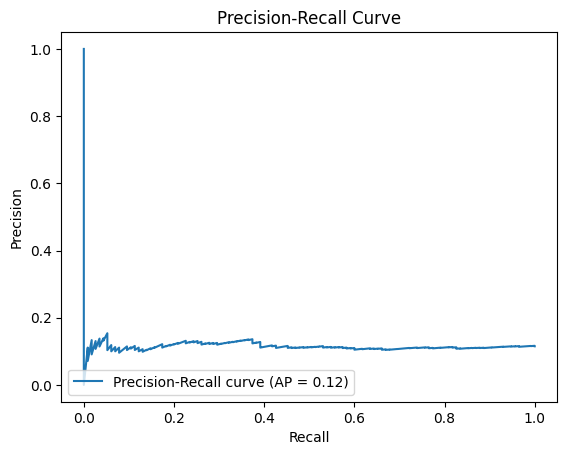

Area under the precision-recall curve: 0.11369140863309087


In [ ]:
# prompt:  perform precision-recall curve

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

# Assuming 'y_test' contains the true labels and 'mse' contains the reconstruction errors
precision, recall, thresholds = precision_recall_curve(y_test, mse)

# Calculate average precision score
average_precision = average_precision_score(y_test, mse)

# Plot precision-recall curve
plt.plot(recall, precision, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Calculate area under the precision-recall curve
area_under_curve = auc(recall, precision)
print("Area under the precision-recall curve:", area_under_curve)


In [ ]:
# prompt: what are the numerical and categorical columns present in  the data set /content/Healthcare Providers.csv

import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Healthcare Providers.csv')

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols.tolist())

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols.tolist())


Numerical columns: ['index', 'National Provider Identifier', 'Zip Code of the Provider']
Categorical columns: ['Last Name/Organization Name of the Provider', 'First Name of the Provider', 'Middle Initial of the Provider', 'Credentials of the Provider', 'Gender of the Provider', 'Entity Type of the Provider', 'Street Address 1 of the Provider', 'Street Address 2 of the Provider', 'City of the Provider', 'State Code of the Provider', 'Country Code of the Provider', 'Provider Type', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code', 'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']


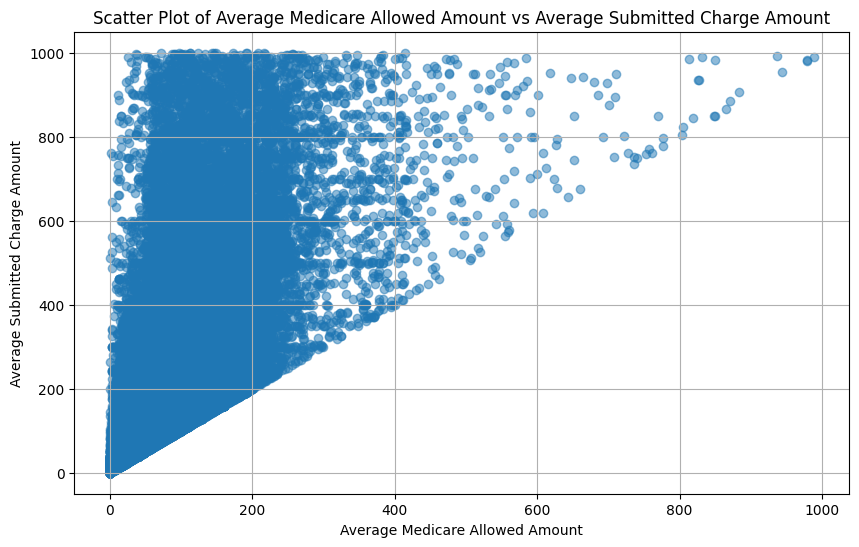

In [ ]:
# prompt: perform scatter plots between Average Medicare Allowed Amount
# Average Submitted Charge Amount

import pandas as pd
import matplotlib.pyplot as plt
# Load the data into a DataFrame called 'data'
# Replace 'your_file.csv' with the actual file path
data = pd.read_csv('/content/Healthcare Providers.csv')

# Convert the relevant columns to numeric, handling any potential non-numeric values
data['Average Medicare Allowed Amount'] = pd.to_numeric(data['Average Medicare Allowed Amount'], errors='coerce')
data['Average Submitted Charge Amount'] = pd.to_numeric(data['Average Submitted Charge Amount'], errors='coerce')

# Drop rows with NaN values in these columns
data_clean = data.dropna(subset=['Average Medicare Allowed Amount', 'Average Submitted Charge Amount'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_clean['Average Medicare Allowed Amount'], data_clean['Average Submitted Charge Amount'], alpha=0.5)
plt.title('Scatter Plot of Average Medicare Allowed Amount vs Average Submitted Charge Amount')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


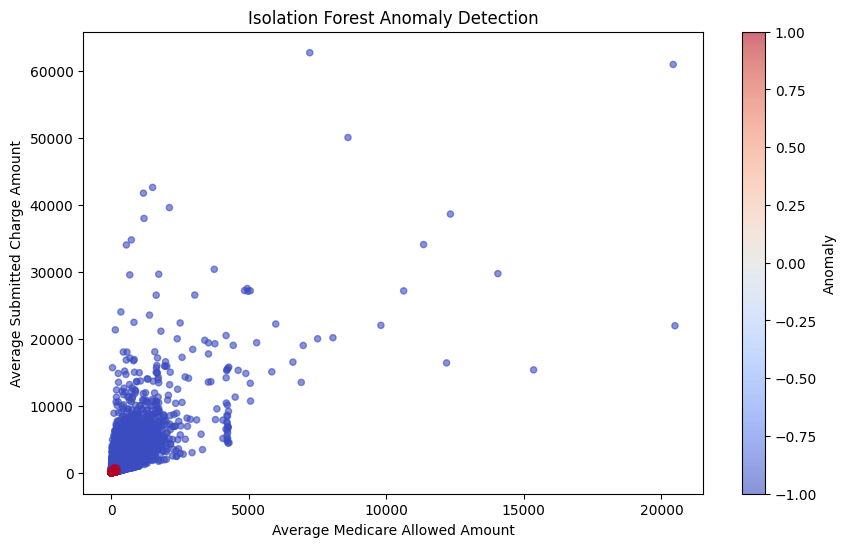

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load the data (replace 'Healthcare Providers.csv' with your actual file path)
df = pd.read_csv('/content/Healthcare Providers.csv', encoding='ascii')

# Select the two numerical columns
numerical_columns = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount']
data = df[numerical_columns]

# Remove commas and convert to numeric
data = data.replace({',': ''}, regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle any missing values by dropping them
data = data.dropna()

# Fit the Isolation Forest model and get predictions for the preprocessed data
iso_forest = IsolationForest(contamination=0.1)
anomalies = iso_forest.fit_predict(data)

# Create a new DataFrame from the preprocessed data and add the anomaly column
df_anomalies = pd.DataFrame(data)
df_anomalies['anomaly'] = anomalies # Assign the anomalies to the new DataFrame

# Visualize the results using scatter plots
plt.figure(figsize=(10, 6))
# Use df_anomalies for plotting to ensure consistency
plt.scatter(df_anomalies['Average Medicare Allowed Amount'], df_anomalies['Average Submitted Charge Amount'],
            c=df_anomalies['anomaly'], cmap='coolwarm', s=20, alpha=0.6)
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel('Average Submitted Charge Amount')
plt.title('Isolation Forest Anomaly Detection')
plt.colorbar(label='Anomaly')
plt.show()


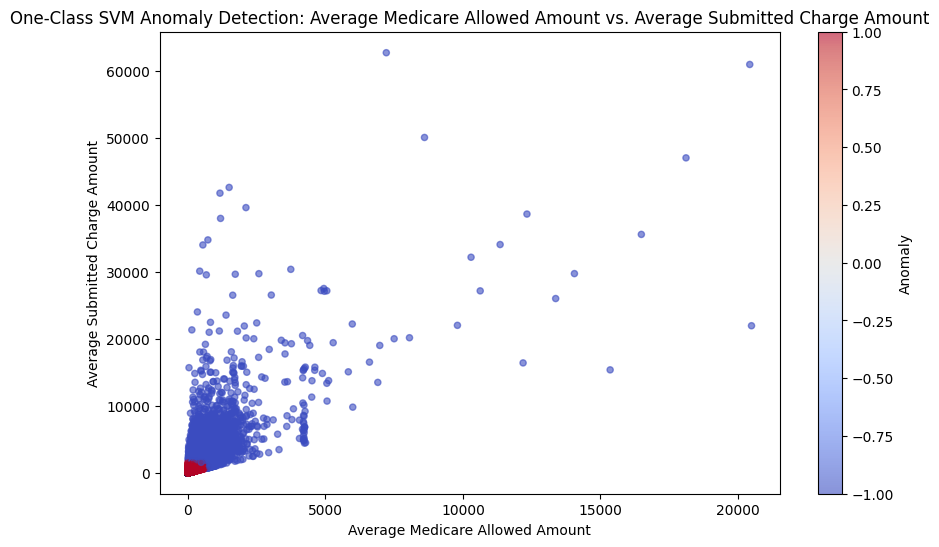

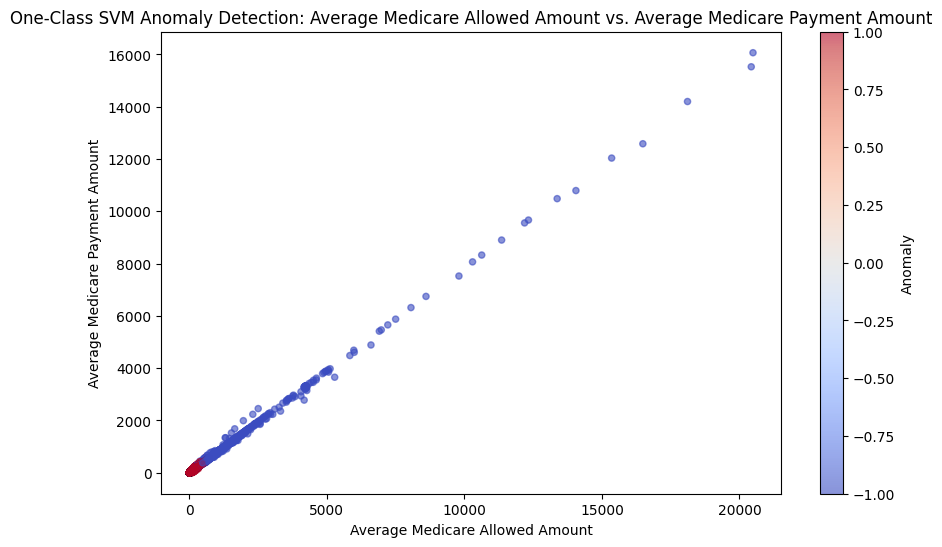

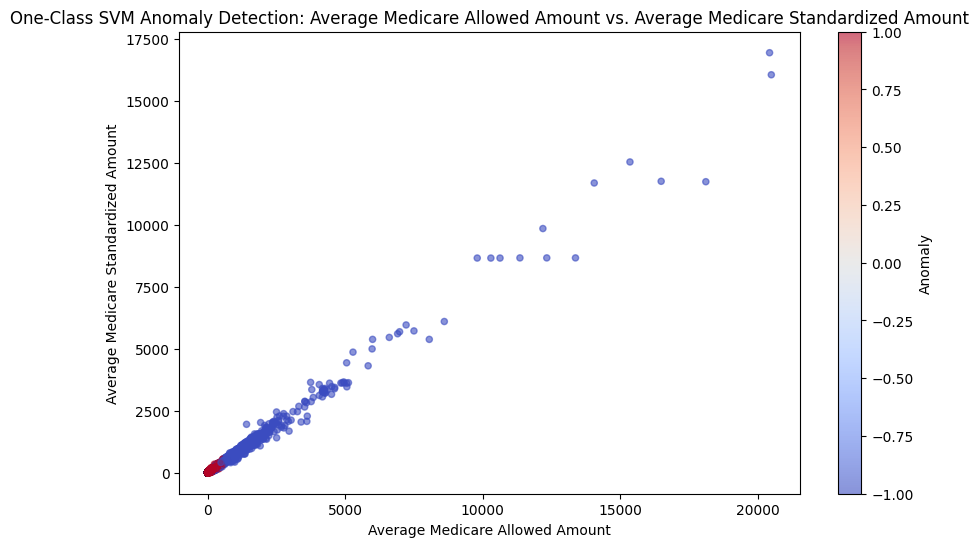

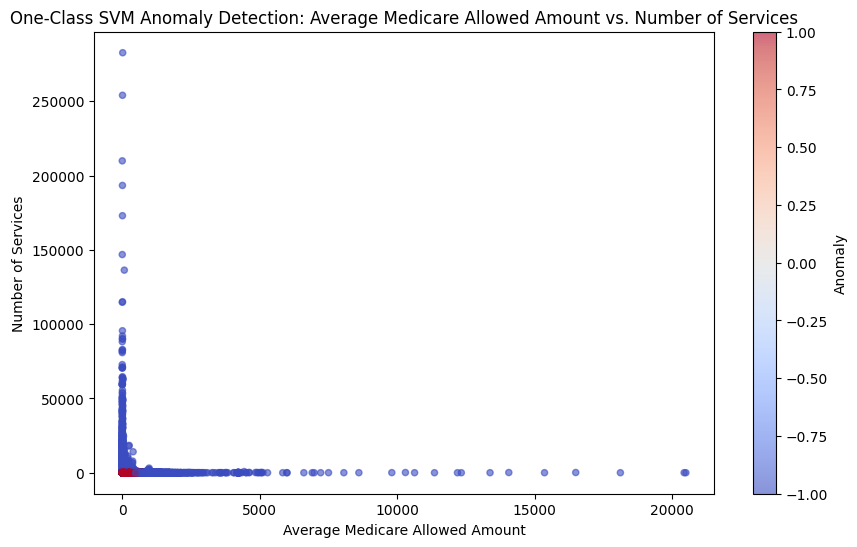

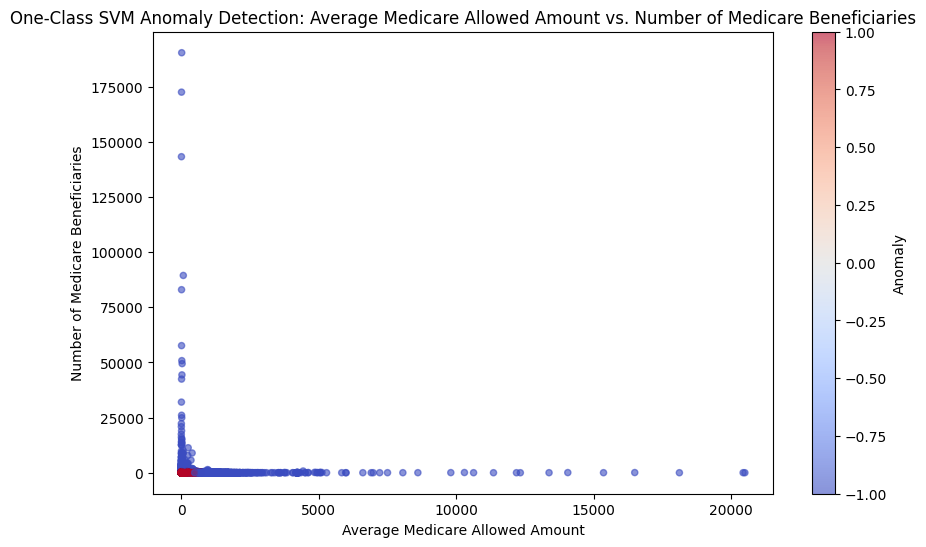

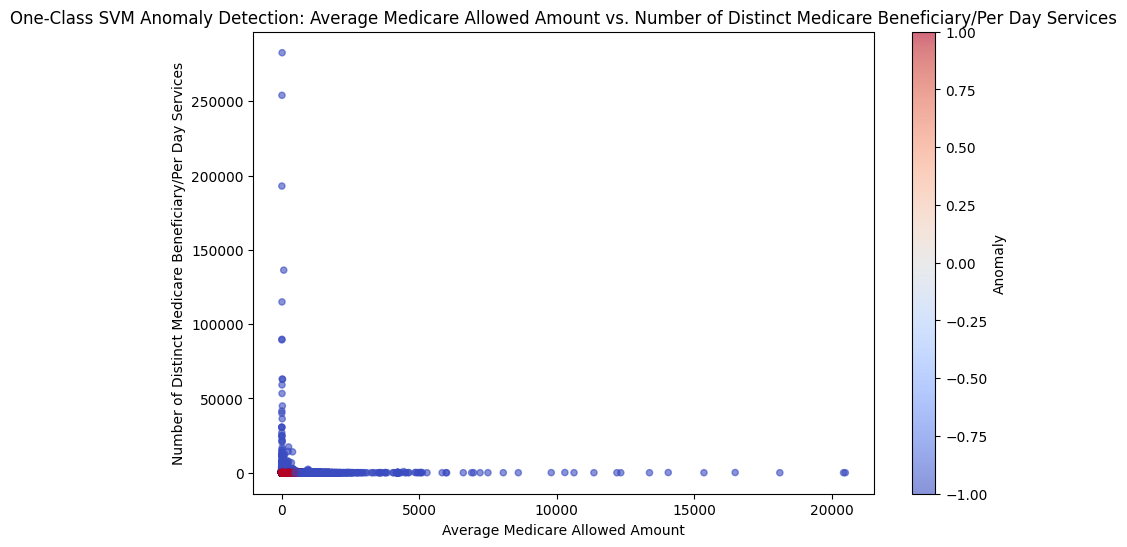

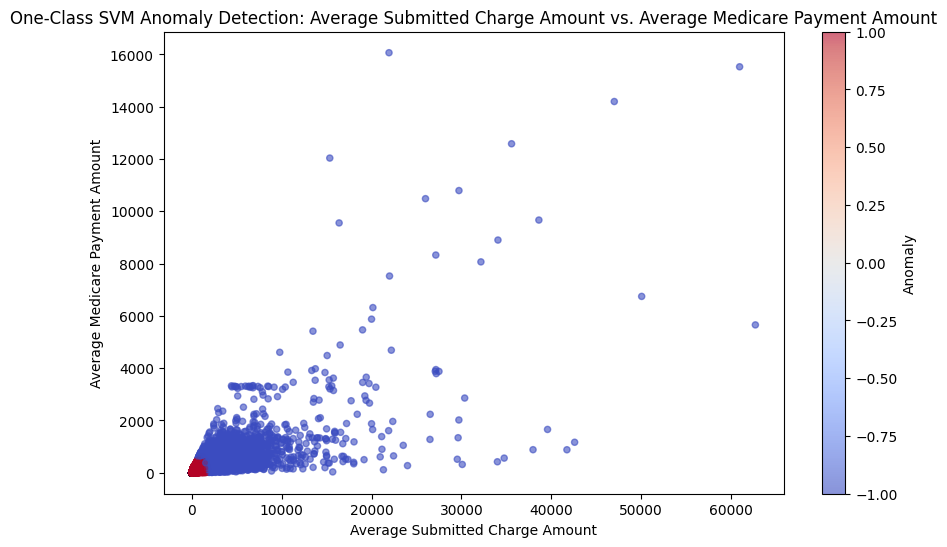

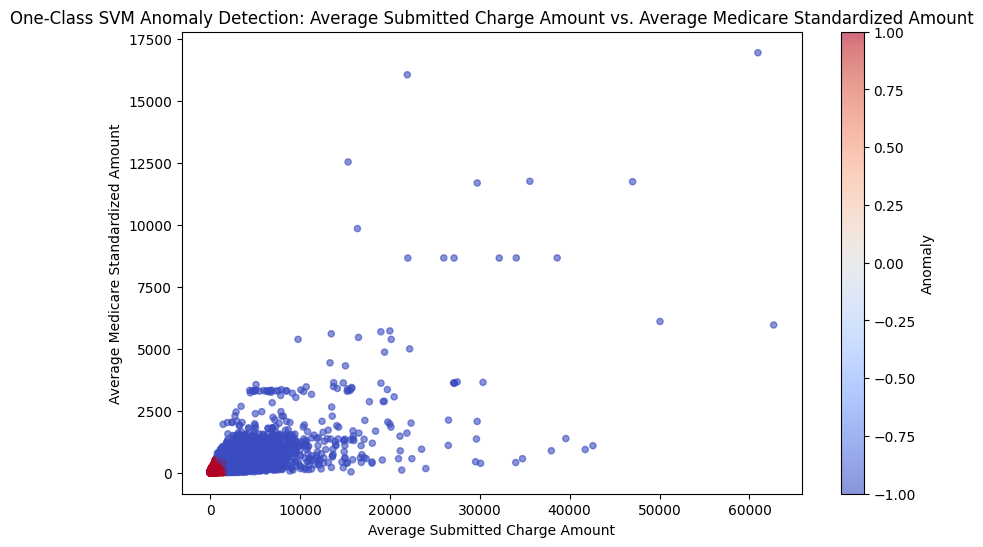

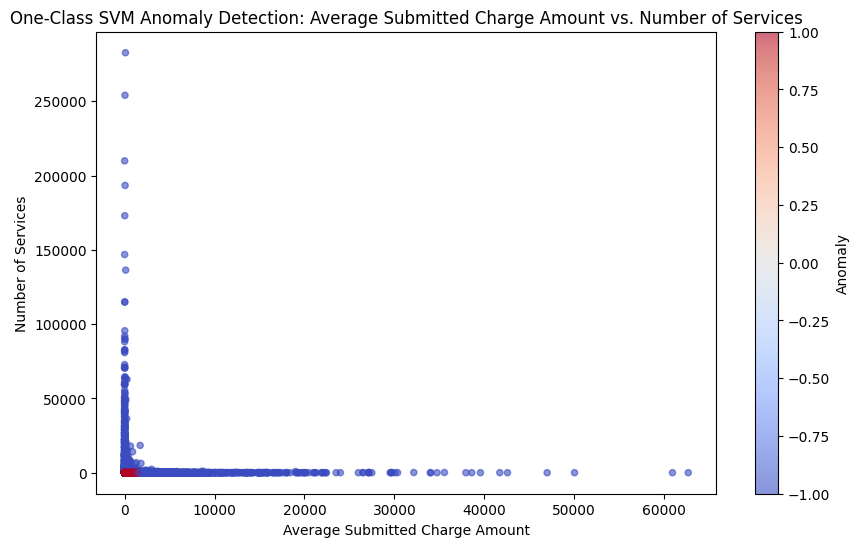

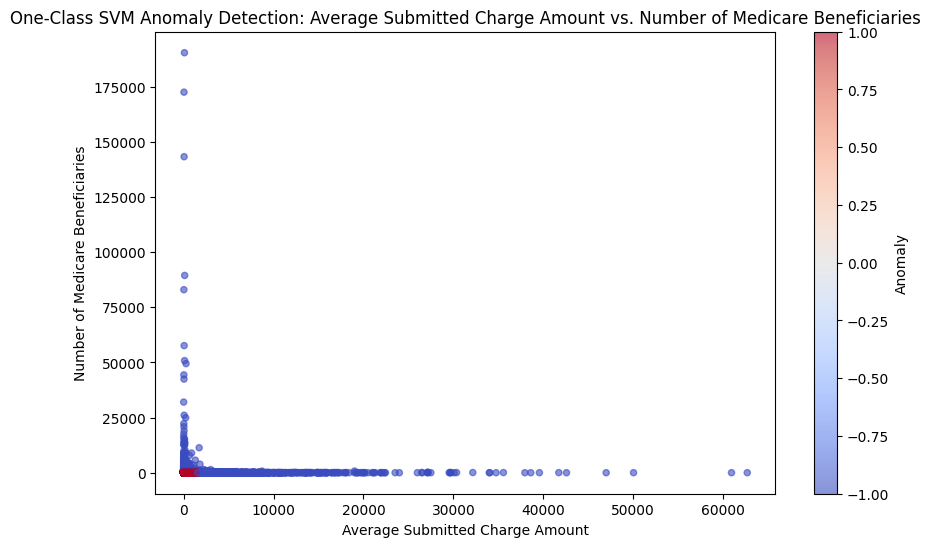

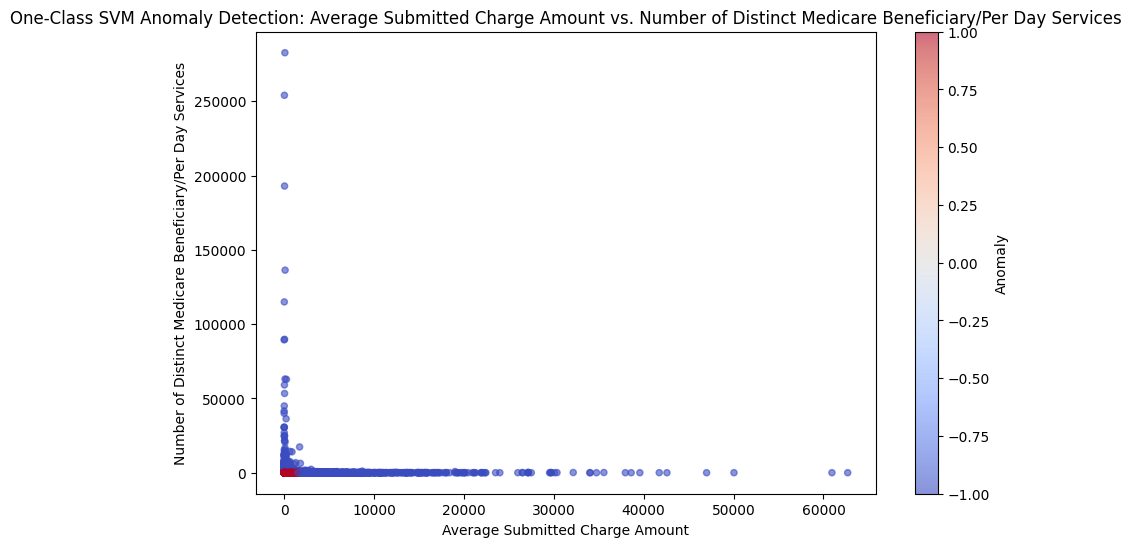

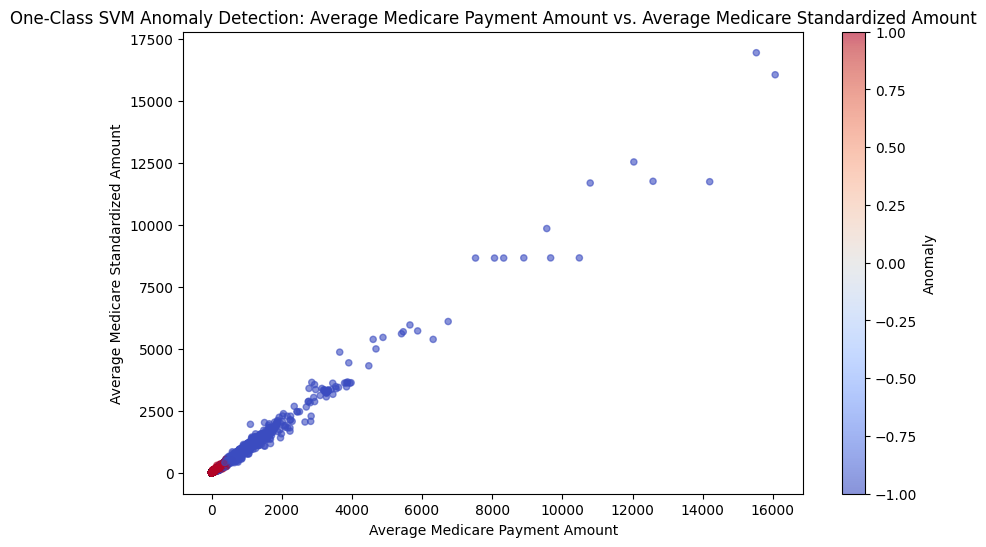

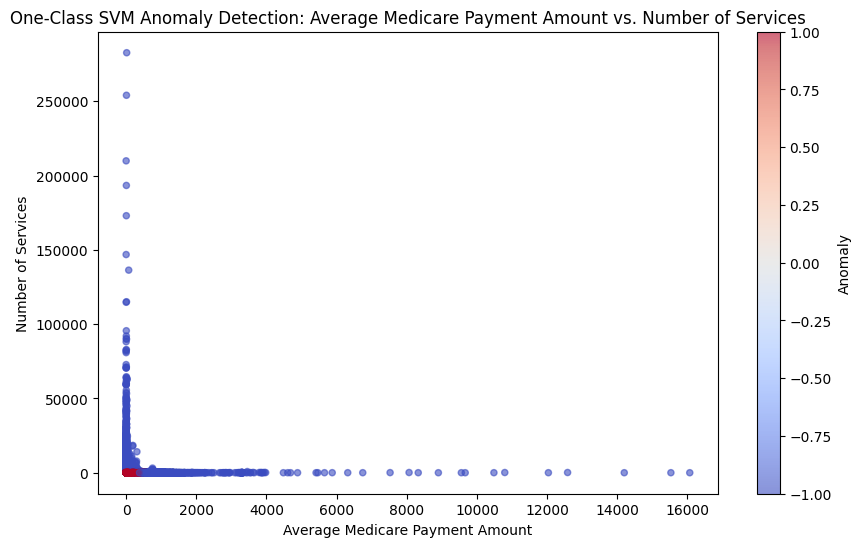

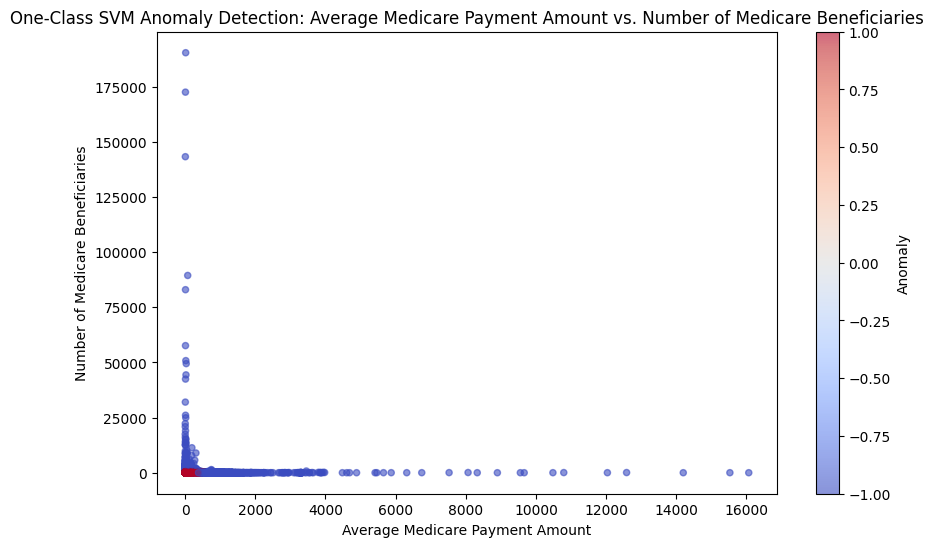

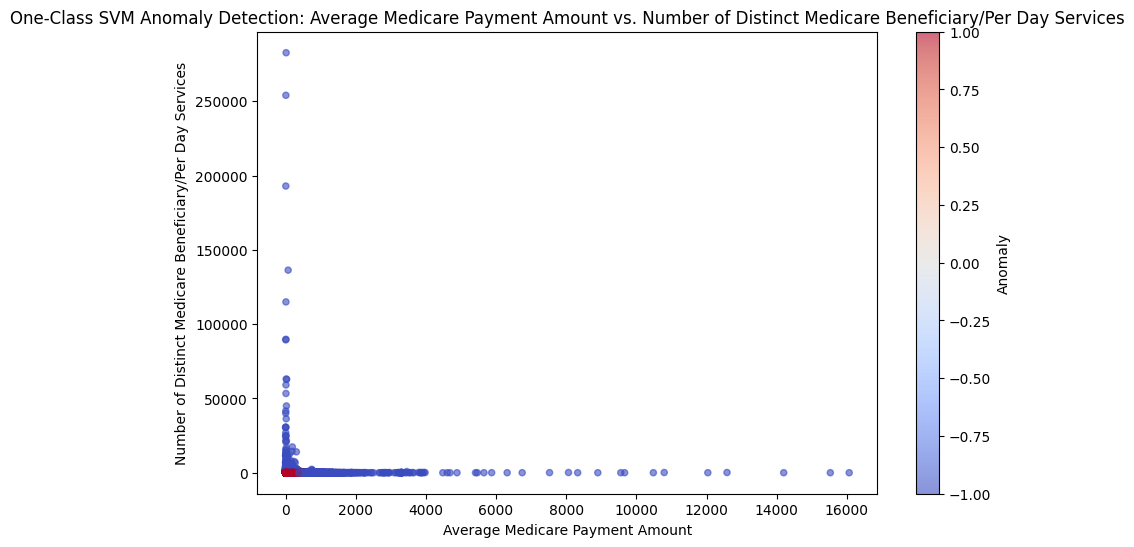

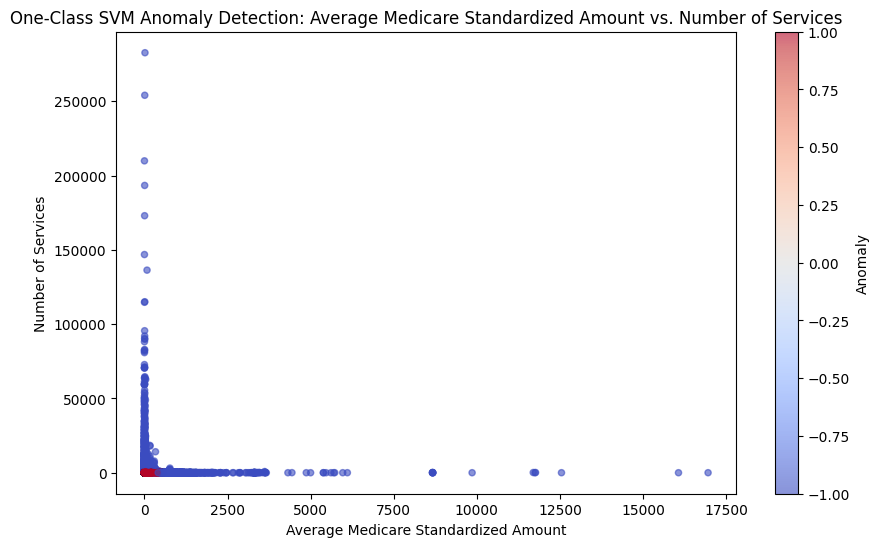

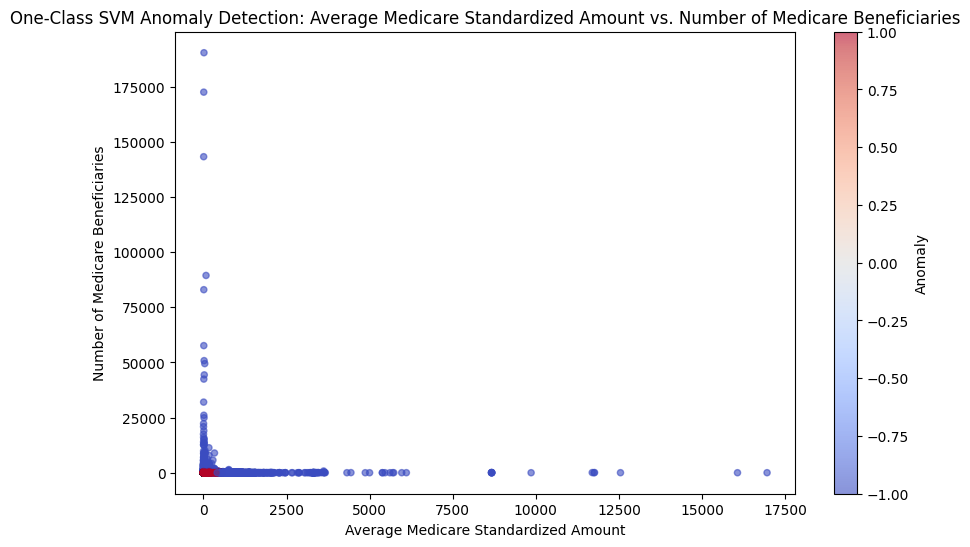

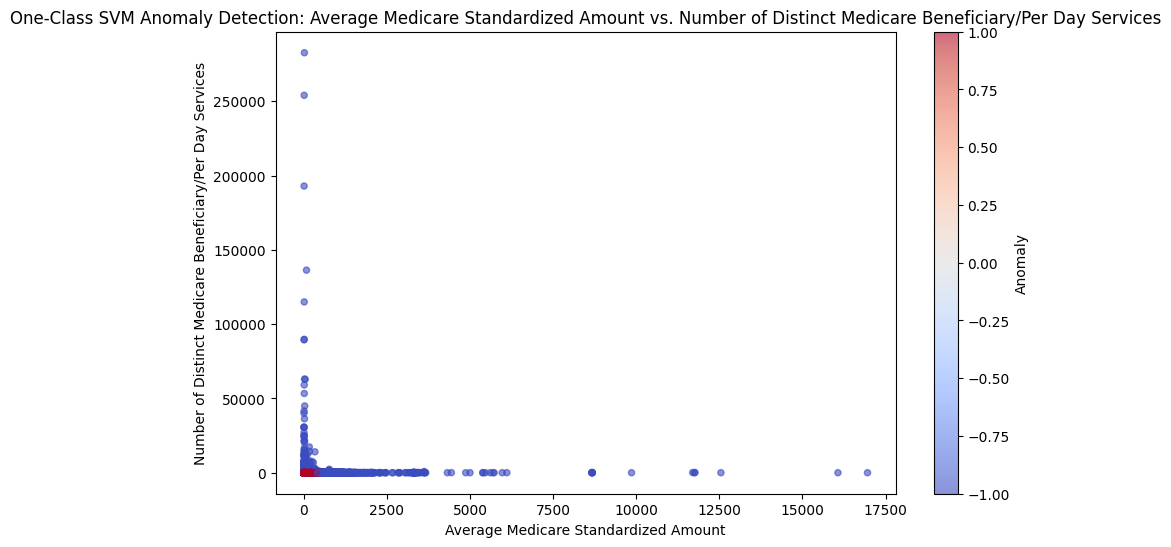

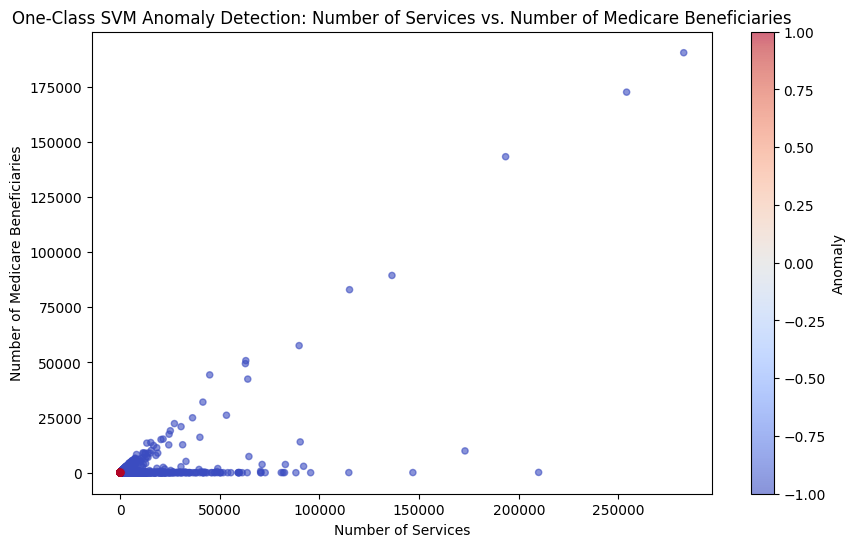

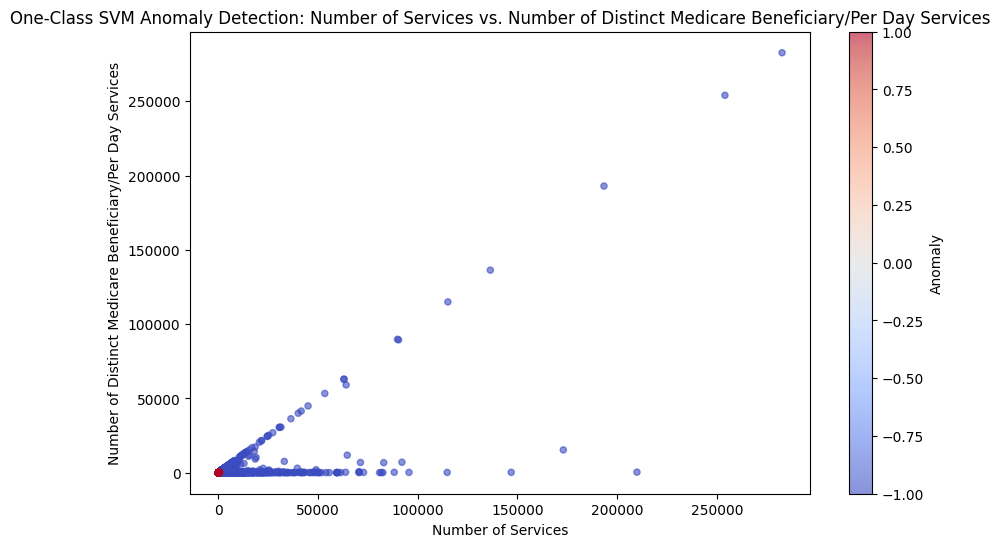

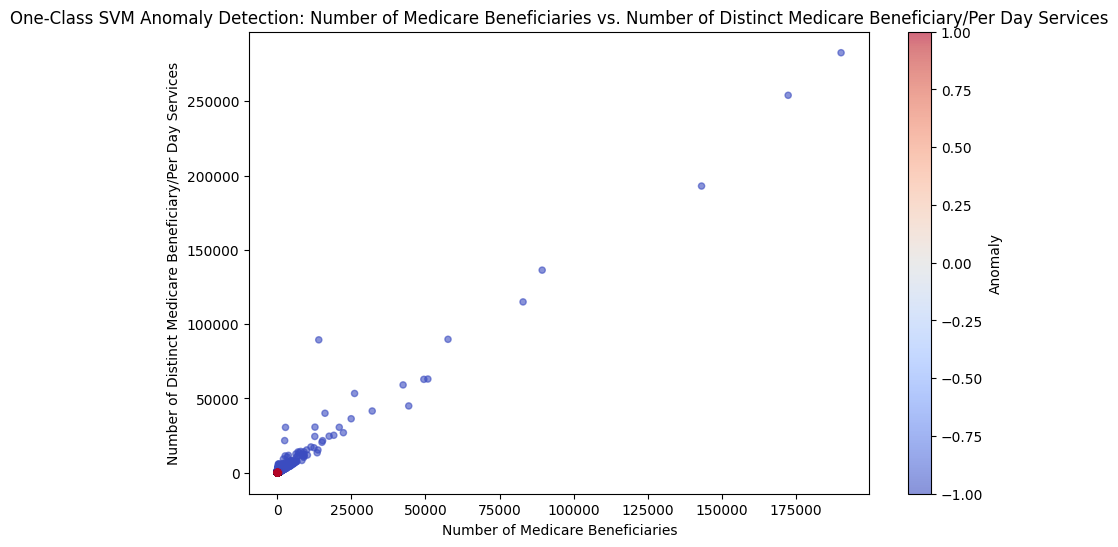

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
# Load the data (replace 'Healthcare Providers.csv' with your actual file path)
df = pd.read_csv('/content/Healthcare Providers.csv', encoding='ascii')

# Select the numerical columns
numerical_columns = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
                    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount',
                    'Number of Services', 'Number of Medicare Beneficiaries',
                    'Number of Distinct Medicare Beneficiary/Per Day Services']
data = df[numerical_columns]

# Remove commas and convert to numeric
data = data.replace({',': ''}, regex=True)
data = data.apply(pd.to_numeric, errors='coerce')

# Handle any missing values by dropping them
data = data.dropna()

# Fit the One-Class SVM model
svm_model = OneClassSVM(nu=0.1)  # Adjust the hyperparameter 'nu' as needed
svm_model.fit(data)

# Predict anomalies (1 for normal, -1 for anomalies)
anomalies = svm_model.predict(data)

# Create a new DataFrame from the preprocessed data and add the anomaly column
df_anomalies = pd.DataFrame(data)
df_anomalies['anomaly'] = anomalies

# Create scatter plots for each pair of numerical columns
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))
        plt.scatter(df_anomalies[numerical_columns[i]], df_anomalies[numerical_columns[j]],
                    c=df_anomalies['anomaly'], cmap='coolwarm', s=20, alpha=0.6)
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.title('One-Class SVM Anomaly Detection: {} vs. {}'.format(numerical_columns[i], numerical_columns[j]))
        plt.colorbar(label='Anomaly')
        plt.show()


## 1.plot


*   This is the plot between Average Submitted Charge Amount and Average Medicare Allowed Amount .
* in which red points indicates the anomaly points and blue points indicates normal points


*   In the above plot we can see that there are less anomaly points compared to normal points.






##2.plot


*   this is plot between Average medicare payment amount vs average medicare allowed amount.
*  we can see very less anomaly points near the origin the graph is increasing linearly



## 3.plot


*  this is plot between Average medicare standardized  amount vs average medicare allowed amount.

*   we can see in which red points indicates the anomaly points and blue points indicates normal points
In the above plot we can see that there are less anomaly points compared to normal points.



# 4.plot


*  this is the plot between number of services vs Average medicare allowed amount.

* we can see that this is an L-shaped graphs with blue points as normal points and red points as anomaly points.
* more anomaly points are stagnated near the origin or corner point.




# plot (Number of Distinct Medicare Beneficiary/Per Day Services vs Number of Services)
This plot indicates the anomalies in red points which are very in low number where blue points indicates the normal points .
where the anomaly points are stagnated near the bottom of the plot and in very less quantity.